# Garbage Classification using Transfer Learning with prediction

![Garbage Classification Output](gc_image.jpg)


In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#Define paths and parameters
img_size = (224, 224)
batch_size = 32
dataset_path = "E:\OneDrive\Desktop\garbage_classification\TrashType_Image_Dataset"

In [3]:
#ImageDataGenerator with train-validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [5]:
#Load Pre-trained MobileNetV2 Model
base_model = MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  

In [6]:
#Add classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

In [7]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

C:\Users\HARIKA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4922 - loss: 1.3096

C:\Users\HARIKA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4940 - loss: 1.3052 - val_accuracy: 0.7276 - val_loss: 0.7480
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7736 - loss: 0.6397 - val_accuracy: 0.7495 - val_loss: 0.6850
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8210 - loss: 0.5014 - val_accuracy: 0.7614 - val_loss: 0.6788
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8341 - loss: 0.4635 - val_accuracy: 0.7992 - val_loss: 0.6168
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8719 - loss: 0.3819 - val_accuracy: 0.7952 - val_loss: 0.6456
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8789 - loss: 0.3258 - val_accuracy: 0.7893 - val_loss: 0.6434
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8957 - loss: 0.2809 - val_accuracy: 0.8032 - val_loss: 0.6402
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8820 - loss: 0.2987 - val_accuracy: 0.8191 - val_loss: 0.5845
E

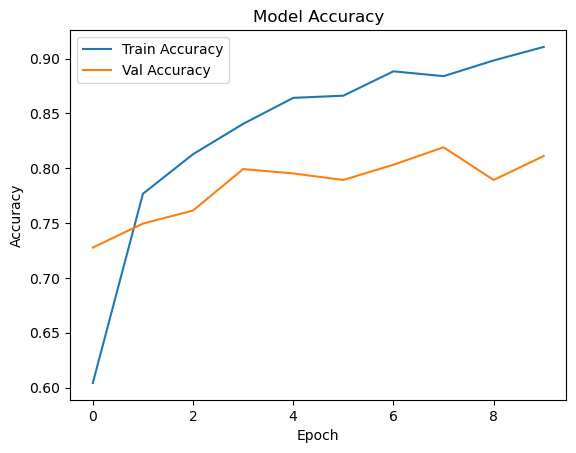

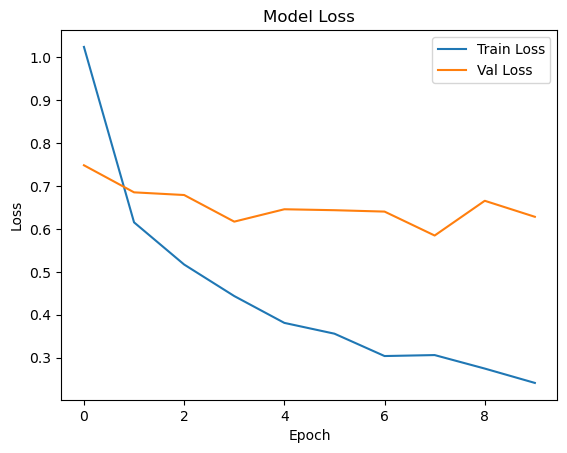

In [8]:
#Visualize training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
#Save the trained model
model.save('garbage_classifier_model.h5')
print("✅ Model saved as 'garbage_classifier_model.h5'")

✅ Model saved as 'garbage_classifier_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 Predicted class: plastic


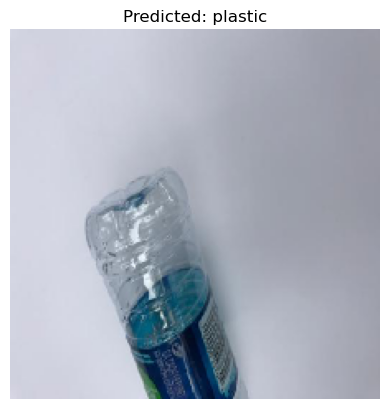

In [10]:
#Predict with a new image
test_image_path = "E:\OneDrive\Desktop\TrashType_Image_Dataset\plastic\plastic_004.jpg" 

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  

# Get class labels
class_names = list(train_data.class_indices.keys())

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Display prediction
print(f"🔍 Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
🔍 Predicted class: glass


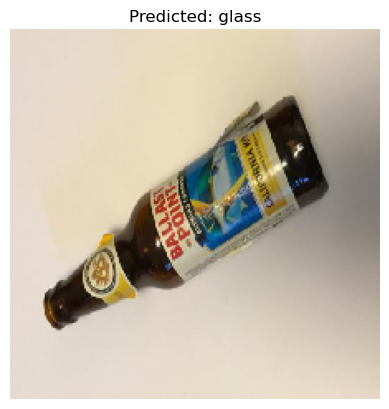

In [11]:
#Predict with a new image
test_image_path = "E:\OneDrive\Desktop\TrashType_Image_Dataset\glass\glass_026.jpg"

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  

# Get class labels
class_names = list(train_data.class_indices.keys())

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Display prediction
print(f"🔍 Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()